In [45]:
from keras.datasets.fashion_mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [82]:
trans = ["T-shirt", "Trouser", "Pullover",
         "Dress", "Coat", "Sandal", "Shirt",
         "Sneaker", "Bag", "Boot"]

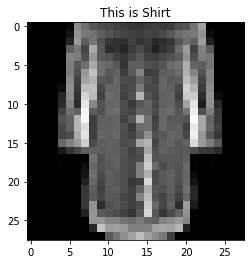

In [54]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
plt.title("This is {}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx], cmap="gray")

In [69]:
# keras
# Model(玩具): Sequential(往上) Model(彈性)\
# Layer(積木): Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=784))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [71]:
# reshape to 1D: mlp need 1D
# / 255: According to Tensorflow weights
# One-hot: 10 prob
# normalize原因: 隨機weights其實有一個喜歡的輸入區間
# Caffe:完全不normalize   TF: -1~1 0~1
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [76]:
# batch_size: 問幾筆資料才做一次梯度下降(走方向:平均)
# 小圖片: 100~200   中等圖片:10~20  大圖片: 1~5
# epochs: 整份資料要看幾次, 控制你到底要訓練到啥時
# validation_split: 你要區分多少來做驗證
# verbose: 預設1(最多log) 我喜歡選2(必要log)
# 5(epochs) * (60000 - 6000)訓練資料 / 200(batch) = 1350(次梯度調整)
model.fit(x_train_norm, y_train_cat,
          batch_size=200, 
          epochs=1,
          validation_split=0.1,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 - 1s - loss: 0.2596 - accuracy: 0.9034 - val_loss: 0.3060 - val_accuracy: 0.8928


In [78]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 23us/step


[0.3299128776192665, 0.8840000033378601]

In [79]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(n) for n in trans]
c = ["{}(預測)".format(n) for n in trans]
percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r) * 100, 2)) for n in r])
pd.DataFrame(percents,
             index=i,
             columns=c)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt(正確),83.9%,0.1%,1.5%,3.5%,0.4%,0.1%,9.5%,0.0%,1.0%,0.0%
Trouser(正確),0.2%,97.2%,0.0%,1.9%,0.3%,0.0%,0.2%,0.0%,0.2%,0.0%
Pullover(正確),1.9%,0.2%,82.5%,0.9%,7.0%,0.0%,7.0%,0.0%,0.5%,0.0%
Dress(正確),1.4%,0.5%,1.1%,91.2%,2.9%,0.1%,2.5%,0.0%,0.3%,0.0%
Coat(正確),0.0%,0.1%,12.8%,3.1%,78.0%,0.0%,5.4%,0.0%,0.6%,0.0%
Sandal(正確),0.1%,0.0%,0.0%,0.0%,0.0%,94.8%,0.0%,3.8%,0.2%,1.1%
Shirt(正確),11.6%,0.2%,8.3%,4.0%,6.7%,0.0%,67.3%,0.0%,1.9%,0.0%
Sneaker(正確),0.0%,0.0%,0.0%,0.0%,0.0%,0.8%,0.0%,97.9%,0.0%,1.3%
Bag(正確),0.5%,0.0%,0.3%,0.4%,0.2%,0.1%,0.4%,0.5%,97.6%,0.0%
Ankle boot(正確),0.0%,0.0%,0.0%,0.0%,0.0%,0.6%,0.1%,5.7%,0.0%,93.6%


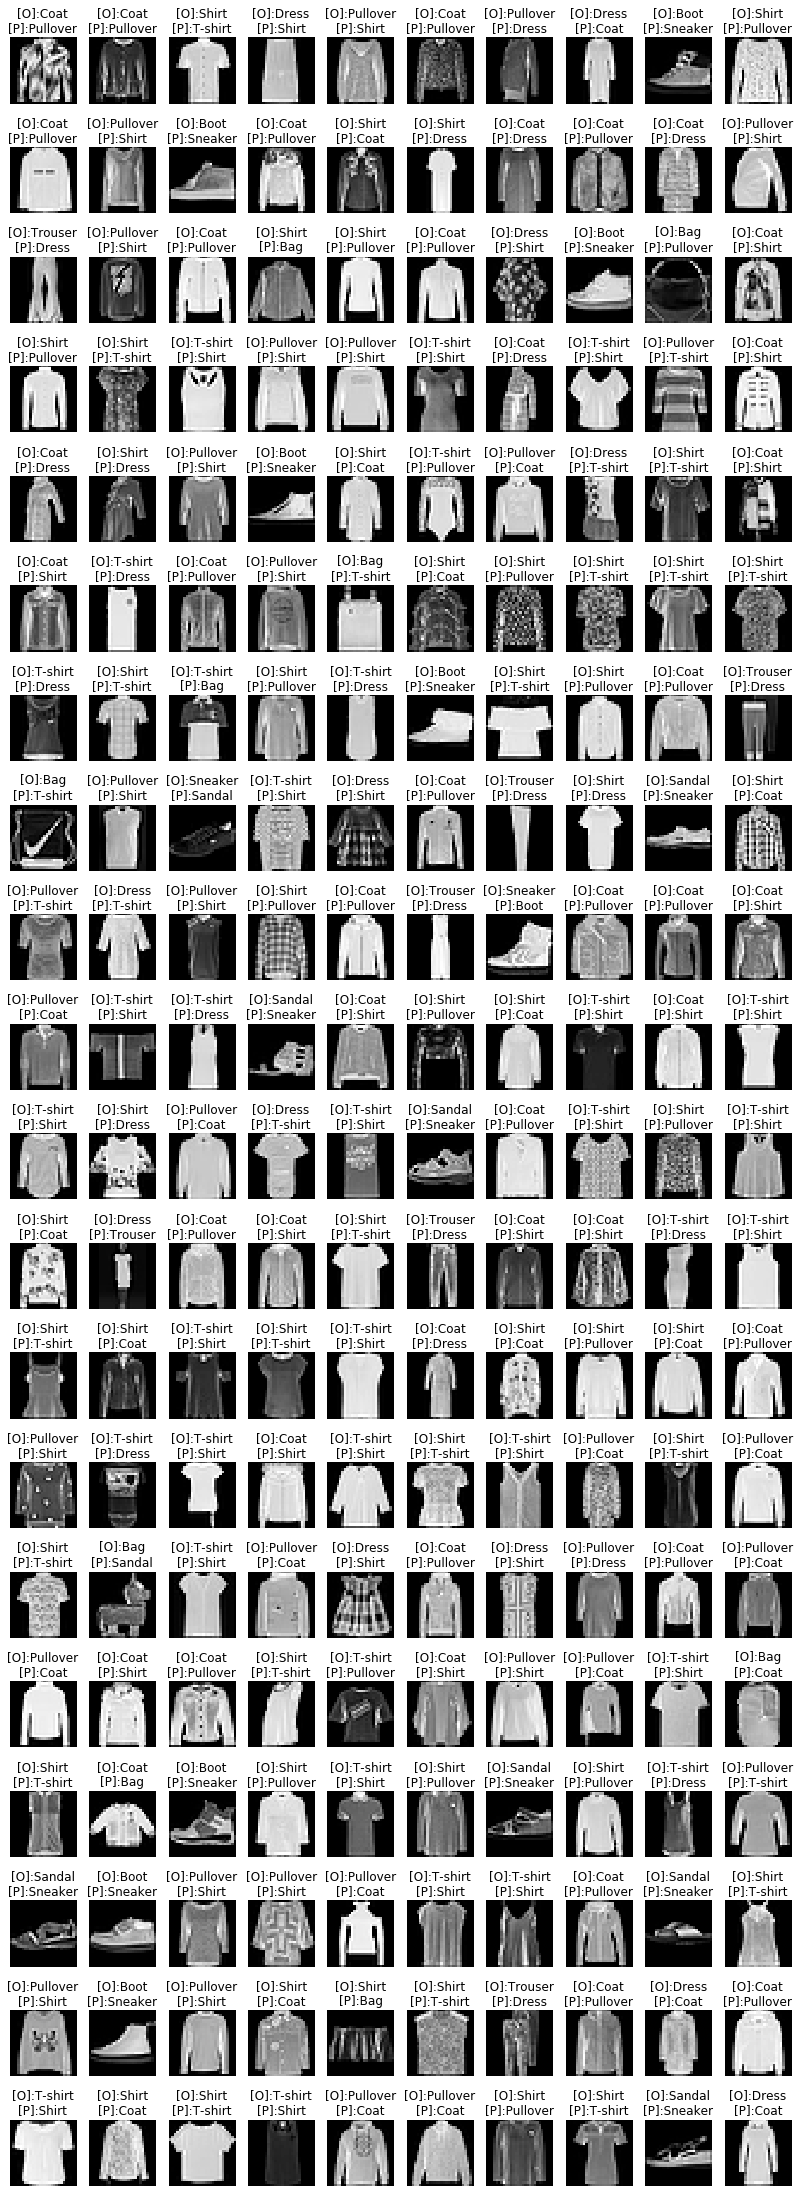

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

idx = np.nonzero(pre != y_test)[0][:200]
pre_false_img = x_test[idx]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[O]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    plt.imshow(img, cmap="gray")

輸入檔名:test3.png


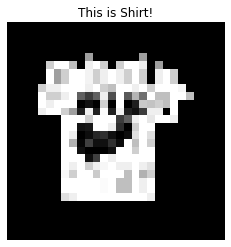

In [85]:
# Pillow
from keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = np.array(load_img(fn, target_size=(28, 28)).convert("L"))
img_np = img.reshape(1, 784) / 255
pre_test = model.predict_classes(img_np)[0]
t = "This is {}!".format(trans[pre_test])
plt.title(t)
plt.axis("off")
plt.imshow(img, cmap="gray")